# ReEDS Scenarios on PV ICE Tool WORLD


To explore different scenarios for furture installation projections of PV (or any technology), ReEDS output data can be useful in providing standard scenarios. ReEDS installation projections are used in this journal as input data to the PV ICE tool. 

Current sections include:

<ol>
    <li> ### Reading a standard ReEDS output file and saving it in a PV ICE input format </li>
<li>### Reading scenarios of interest and running PV ICE tool </li>
<li>###Plotting </li>
<li>### GeoPlotting.</li>
</ol>
    Notes:
   
Scenarios of Interest:
	the Ref.Mod, 
o	95-by-35.Adv, and 
o	95-by-35+Elec.Adv+DR ones


In [1]:
import PV_ICE
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
from IPython.display import display
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent.parent / 'PV_ICE' / 'TEMP')

print ("Your simulation will be stored in %s" % testfolder)


Your simulation will be stored in C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [3]:
PV_ICE.__version__

'0+untagged.469.g6e6de9b.dirty'

In [3]:
SFscenarios = ['World']


#### Create the 3 Scenarios and assign Baselines

Keeping track of each scenario as its own PV ICE Object.

In [4]:
filetitle = r'..\baselines\ReedsSubset\baseline_modules_World_Bogdanov.csv'

In [5]:
#for ii in range (0, 1): #len(scenarios):
i = 0
rr = PV_ICE.Simulation(name='World', path=testfolder)
rr.createScenario(name=SFscenarios[i], file=filetitle)
rr.scenario[SFscenarios[i]].addMaterial('glass', file=r'..\baselines\ReedsSubset\baseline_material_glass_Reeds.csv')
rr.scenario[SFscenarios[i]].addMaterial('silicon', file=r'..\baselines\ReedsSubset\baseline_material_silicon_Reeds.csv')
rr.scenario[SFscenarios[i]].addMaterial('silver', file=r'..\baselines\ReedsSubset\baseline_material_silver_Reeds.csv')
rr.scenario[SFscenarios[i]].addMaterial('copper', file=r'..\baselines\ReedsSubset\baseline_material_copper_Reeds.csv')
rr.scenario[SFscenarios[i]].addMaterial('aluminum', file=r'..\baselines\ReedsSubset\baseline_material_aluminium_Reeds.csv')


path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


# 2 FINISH: Set characteristics of Recycling to SF values.

#### Calculate Mass Flow

In [6]:
IRENA= False
PERFECTMFG = True

mats = ['glass', 'silicon','silver','copper','aluminum']

ELorRL = 'RL'
if IRENA:
    if ELorRL == 'RL':
        weibullInputParams = {'alpha': 5.3759, 'beta':30}  # Regular-loss scenario IRENA
    if ELorRL == 'EL':
        weibullInputParams = {'alpha': 2.49, 'beta':30}  # Regular-loss scenario IRENA
    
    if PERFECTMFG:
        for jj in range (0, len(rr.scenario.keys())):
            rr.scenario[list(rr.scenario.keys())[jj]].data['mod_lifetime'] = 40
            rr.scenario[list(rr.scenario.keys())[jj]].data['mod_MFG_eff'] = 100.0

            for kk in range(0, len(mats)):
                mat = mats[kk]
                rr.scenario[list(rr.scenario.keys())[jj]].material[mat].materialdata['mat_MFG_eff'] = 100.0   
                rr.scenario[list(rr.scenario.keys())[jj]].material[mat].materialdata['mat_MFG_scrap_Recycled'] = 0.0   
               
    
    rr.calculateMassFlow(weibullInputParams=weibullInputParams)
    title_Method = 'Irena_'+ELorRL
else:
    rr.calculateMassFlow()
    title_Method = 'PVICE'


Working on Scenario:  World
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum


## Aggregating PCAs Material Landfilled to obtain US totals by Year

In [7]:
USyearly=pd.DataFrame()

In [8]:
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

In [9]:
keywd = 'mat_Virgin_Stock'

for jj in range(len(SFscenarios)):
    obj = SFscenarios[jj]
    for ii in range(len(materials)):
        USyearly['VirginStock_'+materials[ii]+'_'+obj] = rr.scenario[obj].material[materials[ii]].materialdata[keywd]

    filter_col = [col for col in USyearly if (col.startswith('VirginStock_') and col.endswith(obj))]
    USyearly['VirginStock_Module_'+obj] = USyearly[filter_col].sum(axis=1)

In [10]:
keywd = 'mat_Total_Landfilled'

for jj in range(len(SFscenarios)):
    obj = SFscenarios[jj]
    for ii in range(len(materials)):
        USyearly['Waste_'+materials[ii]+'_'+obj] = rr.scenario[obj].material[materials[ii]].materialdata[keywd]

    filter_col = [col for col in USyearly if (col.startswith('Waste_') and col.endswith(obj)) ]
    USyearly['Waste_Module_'+obj] = USyearly[filter_col].sum(axis=1)

In [11]:
keywd = 'mat_Total_EOL_Landfilled'

for jj in range(len(SFscenarios)):
    obj = SFscenarios[jj]
    for ii in range(len(materials)):
        USyearly['Waste_EOL_'+materials[ii]+'_'+obj] = rr.scenario[obj].material[materials[ii]].materialdata[keywd]

    filter_col = [col for col in USyearly if (col.startswith('Waste_EOL_') and col.endswith(obj)) ]
    USyearly['Waste_EOL_Module_'+obj] = USyearly[filter_col].sum(axis=1)

In [12]:
keywd = 'mat_Total_MFG_Landfilled'

for jj in range(len(SFscenarios)):
    obj = SFscenarios[jj]
    for ii in range(len(materials)):
        USyearly['Waste_MFG_'+materials[ii]+'_'+obj] = rr.scenario[obj].material[materials[ii]].materialdata[keywd]

    filter_col = [col for col in USyearly if (col.startswith('Waste_MFG_') and col.endswith(obj)) ]
    USyearly['Waste_MFG_Module_'+obj] = USyearly[filter_col].sum(axis=1)

### Converting to grams to METRIC Tons. 


In [13]:
USyearly = USyearly/1000000  # This is the ratio for Metric tonnes
#907185 -- this is for US tons


### Adding NEW Installed Capacity to US

In [14]:
keyword='new_Installed_Capacity_[MW]'
for jj in range(len(SFscenarios)):
    obj = SFscenarios[jj]
    USyearly[keyword+obj] = rr.scenario[obj].data[keyword]
 

#### Reindexing and creating c umulative results

In [15]:
UScum = USyearly.copy()
UScum = UScum.cumsum()

### Adding Installed Capacity to US (This is already 'Cumulative') so not including it in UScum

In [16]:
keyword='Installed_Capacity_[W]'
for jj in range(len(SFscenarios)):
    obj = SFscenarios[jj]
    USyearly["Capacity_"+obj] = rr.scenario[obj].data[keyword]
 

#### Set YEAR Index

In [17]:
USyearly.index = rr.scenario[obj].data['year']
UScum.index = rr.scenario[obj].data['year']

In [18]:
USyearly.head().iloc[1]

VirginStock_glass_World             5.845518e+07
VirginStock_silicon_World           5.898482e+06
VirginStock_silver_World            1.069643e+05
VirginStock_copper_World            4.146420e+04
VirginStock_aluminum_World          1.393324e+07
VirginStock_Module_World            7.843533e+07
Waste_glass_World                   4.033407e+06
Waste_silicon_World                 3.046645e+06
Waste_silver_World                  2.310428e+04
Waste_copper_World                  4.892776e+03
Waste_aluminum_World                4.152106e+05
Waste_Module_World                  7.523260e+06
Waste_EOL_glass_World               6.671246e-02
Waste_EOL_silicon_World             3.495899e-03
Waste_EOL_silver_World              2.134799e-04
Waste_EOL_copper_World              4.483077e-05
Waste_EOL_aluminum_World            1.668896e-02
Waste_EOL_Module_World              8.715562e-02
Waste_MFG_glass_World               4.033407e+06
Waste_MFG_silicon_World             3.046645e+06
Waste_MFG_silver_Wor

In [19]:
USyearly.head()

VirginStock_glass_World  VirginStock_silicon_World  \
year                                                       
2009             5.894527e+07               9.371135e+06   
2010             5.845518e+07               5.898482e+06   
2011             5.690669e+07               5.704484e+06   
2012             5.635610e+07               5.711201e+06   
2013             5.477981e+07               5.355709e+06   

      VirginStock_silver_World  VirginStock_copper_World  \
year                                                       
2009             223992.035805              41811.846684   
2010             106964.252482              41464.204730   
2011              86775.635305              40365.815200   
2012              68068.160689              39579.468151   
2013              45860.923262              38095.238095   

      VirginStock_aluminum_World  VirginStock_Module_World  Waste_glass_World  \
year                                                                            
2009                1.415011e+07              8.273232e+07       4.067224e+06   
2010                1.393324e+07              7.843533e+07       4.033407e+06   
2011                1.342383e+07              7.616215e+07       3.926567e+06   
2012                1.313818e+07              7.531313e+07       3.888644e+06   
2013                1.043250e+07              7.065197e+07       3.780282e+06   

      Waste_silicon_World  Waste_silver_World  Waste_copper_World  ...  \
year                                                               ...   
2009         6.495388e+06        48382.279734         4933.797909  ...   
2010         3.046645e+06        23104.278750         4892.776203  ...   
2011         2.928193e+06        18743.554604         4763.169851  ...   
2012         2.988997e+06        14702.953308         4670.426463  ...   
2013         2.735609e+06         9907.421159         4495.557312  ...   

      Waste_EOL_aluminum_World  Waste_EOL_Module_World  Waste_MFG_glass_World  \
year                                                                            
2009                  0.000000                0.000000           4.067224e+06   
2010                  0.016689                0.087156           4.033407e+06   
2011                  1.361513                7.110439           3.926562e+06   
2012                 18.319451               95.684123           3.888571e+06   
2013                118.766176              620.464913           3.779807e+06   

      Waste_MFG_silicon_World  Waste_MFG_silver_World  Waste_MFG_copper_World  \
year                                                                            
2009             6.495388e+06            48382.279734             4933.797909   
2010             3.046645e+06            23104.278536             4892.776158   
2011             2.928192e+06            18743.537226             4763.166194   
2012             2.988993e+06            14702.722709             4670.377242   
2013             2.735584e+06             9905.959425             4495.238095   

      Waste_MFG_aluminum_World  Waste_MFG_Module_World  \
year                                                     
2009             421673.149894            1.103760e+07   
2010             415210.620983            7.523260e+06   
2011             400030.001829            7.278291e+06   
2012             391517.806614            7.288455e+06   
2013             310888.555288            6.840681e+06   

      new_Installed_Capacity_[MW]World  Capacity_World  
year                                                    
2009                         1000000.0    1.006860e+12  
2010                         1000000.0    2.006803e+12  
2011                         1000000.0    3.000622e+12  
2012                         1000000.0    3.991528e+12  
2013                         1000000.0    4.979357e+12  

[5 rows x 26 columns]

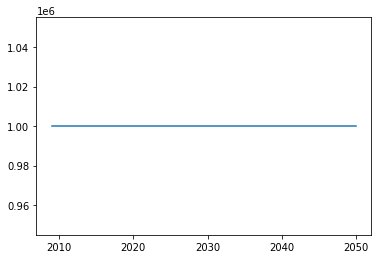

In [20]:
plt.plot(USyearly['new_Installed_Capacity_[MW]World'])

In [21]:
UScum.head()

VirginStock_glass_World  VirginStock_silicon_World  \
year                                                       
2009             5.894527e+07               9.371135e+06   
2010             1.174004e+08               1.526962e+07   
2011             1.743071e+08               2.097410e+07   
2012             2.306632e+08               2.668530e+07   
2013             2.854431e+08               3.204101e+07   

      VirginStock_silver_World  VirginStock_copper_World  \
year                                                       
2009             223992.035805              41811.846684   
2010             330956.288286              83276.051413   
2011             417731.923592             123641.866613   
2012             485800.084281             163221.334764   
2013             531661.007543             201316.572859   

      VirginStock_aluminum_World  VirginStock_Module_World  Waste_glass_World  \
year                                                                            
2009                1.415011e+07              8.273232e+07       4.067224e+06   
2010                2.808335e+07              1.611676e+08       8.100631e+06   
2011                4.150717e+07              2.373298e+08       1.202720e+07   
2012                5.464536e+07              3.126429e+08       1.591584e+07   
2013                6.507786e+07              3.832949e+08       1.969612e+07   

      Waste_silicon_World  Waste_silver_World  Waste_copper_World  ...  \
year                                                               ...   
2009         6.495388e+06        48382.279734         4933.797909  ...   
2010         9.542034e+06        71486.558483         9826.574112  ...   
2011         1.247023e+07        90230.113087        14589.743963  ...   
2012         1.545922e+07       104933.066395        19260.170426  ...   
2013         1.819483e+07       114840.487554        23755.727738  ...   

      Waste_EOL_copper_World  Waste_EOL_aluminum_World  \
year                                                     
2009                0.000000                  0.000000   
2010                0.000045                  0.016689   
2011                0.003702                  1.378202   
2012                0.052924                 19.697653   
2013                0.372141                138.463829   

      Waste_EOL_Module_World  Waste_MFG_glass_World  Waste_MFG_silicon_World  \
year                                                                           
2009                0.000000           4.067224e+06             6.495388e+06   
2010                0.087156           8.100631e+06             9.542034e+06   
2011                7.197594           1.202719e+07             1.247023e+07   
2012              102.881717           1.591576e+07             1.545922e+07   
2013              723.346631           1.969557e+07             1.819480e+07   

      Waste_MFG_silver_World  Waste_MFG_copper_World  \
year                                                   
2009            48382.279734             4933.797909   
2010            71486.558270             9826.574067   
2011            90230.095496            14589.740260   
2012           104932.818205            19260.117502   
2013           114838.777629            23755.355597   

      Waste_MFG_aluminum_World  Waste_MFG_Module_World  \
year                                                     
2009              4.216731e+05            1.103760e+07   
2010              8.368838e+05            1.856086e+07   
2011              1.236914e+06            2.583915e+07   
2012              1.628432e+06            3.312761e+07   
2013              1.939320e+06            3.996829e+07   

      new_Installed_Capacity_[MW]World  
year                                    
2009                         1000000.0  
2010                         2000000.0  
2011                         3000000.0  
2012                         4000000.0  
2013                         5000000.0  

[5 rows x 25 columns]

### 3 sig figures save Yearly and cumulative overview Nation

In [22]:
USyearly3sig = USyearly.copy()
UScum3sig = UScum.copy()
N = 2

UScum3sig = UScum3sig.drop(UScum3sig.index[0])
USyearly3sig = USyearly3sig.drop(USyearly3sig.index[0])

if IRENA:
    UScum3sig = UScum3sig.loc[:, ~UScum3sig.columns.str.startswith('Waste_MFG_')]
    USyearly3sig = USyearly3sig.loc[:, ~USyearly3sig.columns.str.startswith('Waste_MFG_')]

USyearly3sig = USyearly3sig.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
USyearly3sig = USyearly3sig.applymap(lambda x: int(x))

UScum3sig = UScum3sig.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
UScum3sig = UScum3sig.applymap(lambda x: int(x))

USyearly3sig.to_csv(title_Method+' US_Yearly NATION.csv')
UScum3sig.to_csv(title_Method+' US_Cumulative NATION.csv')


In [23]:
print("Sanity check: mat_Total_Landfilled = mat_Total_EOL_Landfilled + mat_Total_MFG_Landfilled")
A = rr.scenario[obj].material[materials[ii]].materialdata['mat_Total_Landfilled'].iloc[5]
B = rr.scenario[obj].material[materials[ii]].materialdata['mat_Total_EOL_Landfilled'].iloc[5]
C = rr.scenario[obj].material[materials[ii]].materialdata['mat_Total_MFG_Landfilled'].iloc[5]
A - B - C

Sanity check: mat_Total_Landfilled = mat_Total_EOL_Landfilled + mat_Total_MFG_Landfilled


0.0

# PLOT

## Yearly Virgin Material Needs by Scenario

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


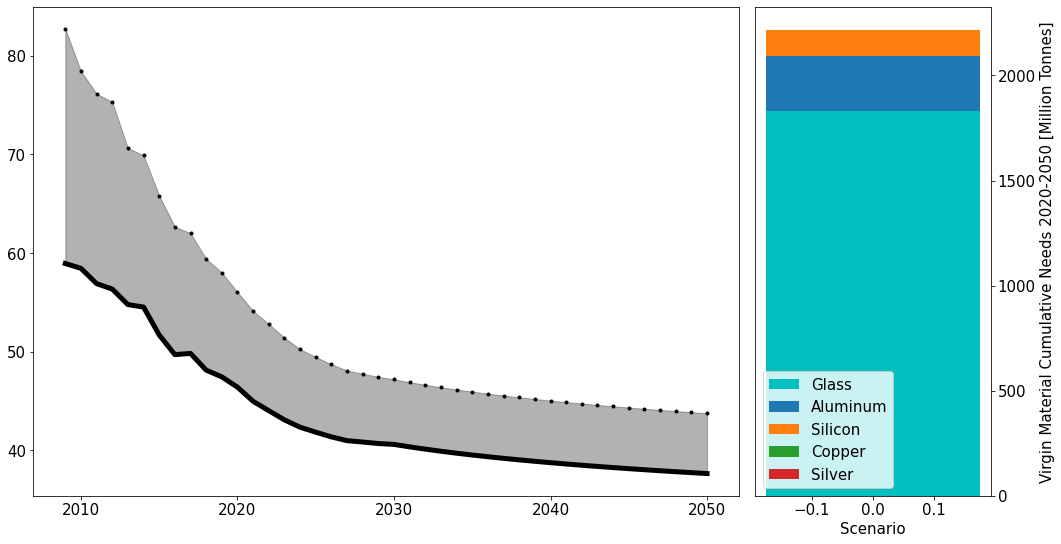

In [24]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='VirginStock_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################

    
    
# Loop over Keywords
ii = 0 
# Loop over SF Scenarios

# loop plotting over scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFscenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj]+USyearly[keyw+materials[1]+'_'+obj]+
            USyearly[keyw+materials[2]+'_'+obj]+USyearly[keyw+materials[3]+'_'+obj]+
            USyearly[keyw+materials[4]+'_'+obj])
glassmat = (USyearly[keyw+materials[0]+'_'+obj])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(rr.scenario[obj].data['year'], modulemat, 'k.', linewidth=5, label='S1 Reference Scenario: module mass')
a0.plot(rr.scenario[obj].data['year'], glassmat, 'k', linewidth=5, label='S1 Reference Scenario: glass mass only')
a0.fill_between(rr.scenario[obj].data['year'], glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)


    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 1):
        obj = SFscenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_'+obj].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminum']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(1)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminum'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Virgin Material Cumulative Needs 2020-2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'Aluminum', 'Silicon','Copper','Silver'))

f.tight_layout()

f.savefig(title_Method+' Fig_2x1_WORLD Yearly Virgin Material Needs by Scenario and Cumulatives.png', dpi=600)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


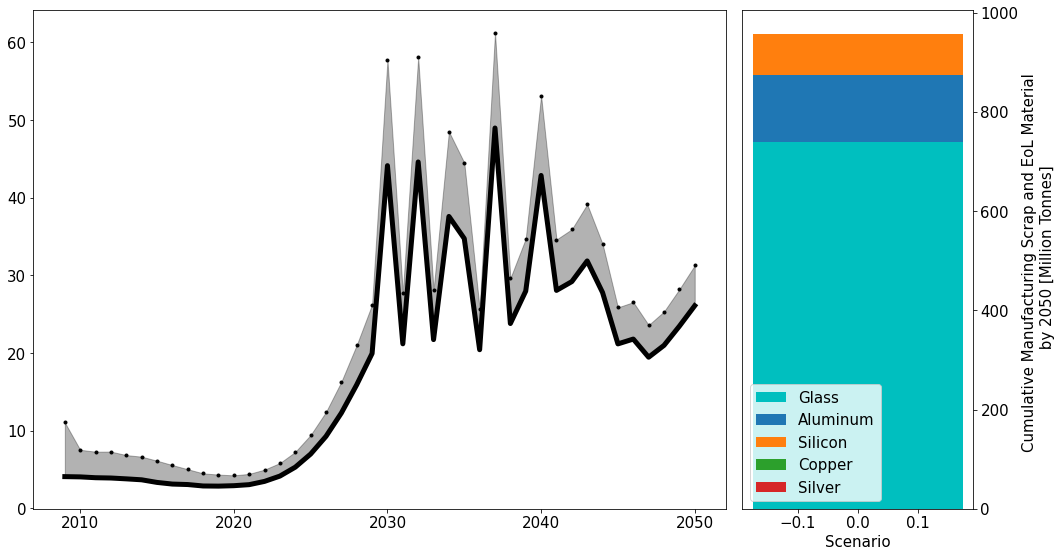

In [27]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)

keyw='Waste_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################

    
    
# Loop over Keywords
ii = 0 
# Loop over SF Scenarios

# loop plotting over scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFscenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj]+USyearly[keyw+materials[1]+'_'+obj]+
            USyearly[keyw+materials[2]+'_'+obj]+USyearly[keyw+materials[3]+'_'+obj]+
            USyearly[keyw+materials[4]+'_'+obj])
glassmat = (USyearly[keyw+materials[0]+'_'+obj])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(rr.scenario[obj].data['year'], modulemat, 'k.', linewidth=5, label='S1 Reference Scenario: module mass')
a0.plot(rr.scenario[obj].data['year'], glassmat, 'k', linewidth=5, label='S1 Reference Scenario: glass mass only')
a0.fill_between(rr.scenario[obj].data['year'], glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)


    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 1):
        obj = SFscenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_'+obj].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminum']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(1)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminum'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Cumulative Manufacturing Scrap and EoL Material \n by 2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'Aluminum', 'Silicon','Copper','Silver'))

f.tight_layout()

f.savefig(title_Method+' Fig_2x1_Yearly MFG and EOL Material by Scenario and Cumulatives_Nation.png', dpi=600)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


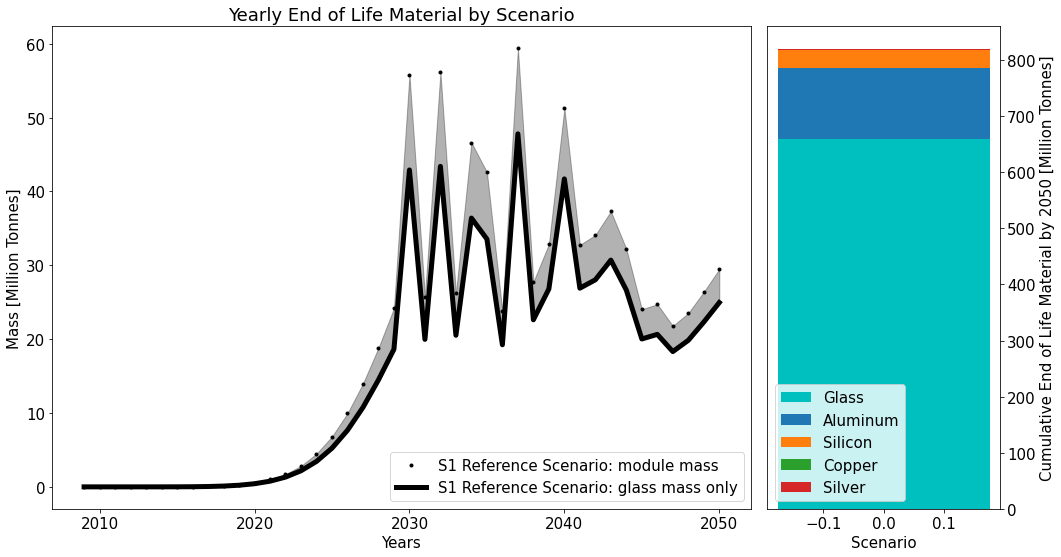

In [28]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_EOL_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################

    
    
# Loop over Keywords
ii = 0 
# Loop over SF Scenarios

# loop plotting over scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFscenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj]+USyearly[keyw+materials[1]+'_'+obj]+
            USyearly[keyw+materials[2]+'_'+obj]+USyearly[keyw+materials[3]+'_'+obj]+
            USyearly[keyw+materials[4]+'_'+obj])
glassmat = (USyearly[keyw+materials[0]+'_'+obj])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(rr.scenario[obj].data['year'], modulemat, 'k.', linewidth=5, label='S1 Reference Scenario: module mass')
a0.plot(rr.scenario[obj].data['year'], glassmat, 'k', linewidth=5, label='S1 Reference Scenario: glass mass only')
a0.fill_between(rr.scenario[obj].data['year'], glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)
a0.legend()
a0.set_title('Yearly End of Life Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')

a0.set_xlabel('Years')



    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 1):
        obj = SFscenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_'+obj].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminum']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(1)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminum'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Cumulative End of Life Material by 2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2', 'S3'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'Aluminum', 'Silicon','Copper','Silver'))

f.tight_layout()

f.savefig(title_Method+' Fig_2x1_Yearly EoL Waste by Scenario and Cumulatives_Nation.png', dpi=600)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


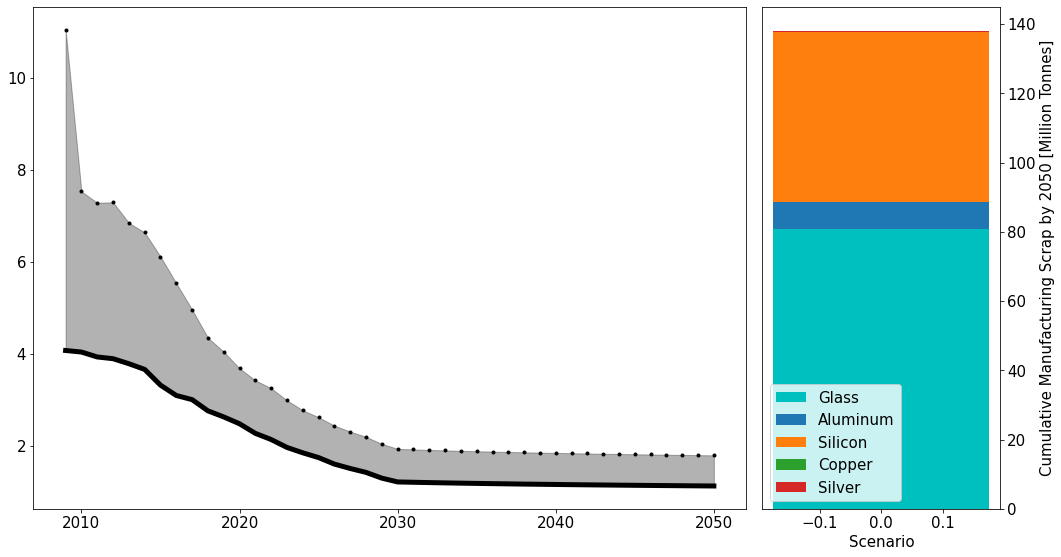

In [31]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_MFG_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################

    
    
# Loop over Keywords
ii = 0 
# Loop over SF Scenarios

# loop plotting over scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFscenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj]+USyearly[keyw+materials[1]+'_'+obj]+
            USyearly[keyw+materials[2]+'_'+obj]+USyearly[keyw+materials[3]+'_'+obj]+
            USyearly[keyw+materials[4]+'_'+obj])
glassmat = (USyearly[keyw+materials[0]+'_'+obj])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(rr.scenario[obj].data['year'], modulemat, 'k.', linewidth=5, label='S1 Reference Scenario: module mass')
a0.plot(rr.scenario[obj].data['year'], glassmat, 'k', linewidth=5, label='S1 Reference Scenario: glass mass only')
a0.fill_between(rr.scenario[obj].data['year'], glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)



########################    
# SUBPLOT 2
########################
#######################
# Calculate    
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 1):
        obj = SFscenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_'+obj].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminum']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(1)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminum'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Cumulative Manufacturing Scrap by 2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'Aluminum', 'Silicon','Copper','Silver'))

f.tight_layout()

f.savefig(title_Method+' Fig_2x1_Yearly MFG Waste by Scenario and Cumulatives_Nation.png', dpi=600)

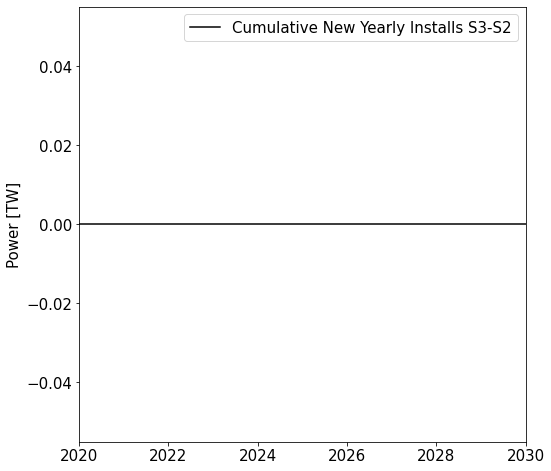

In [33]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)

fig, axs = plt.subplots(figsize=(8, 8))
axs.plot(UScum['new_Installed_Capacity_[MW]'+SFscenarios[0]]/1e6-UScum['new_Installed_Capacity_[MW]'+SFscenarios[0]]/1e6, 'k', label='Cumulative New Yearly Installs S3-S2')

#axs.plot(UScum['new_Installed_Capacity_[MW]'+SFscenarios[2]]/1e6, 'c', label='Cumulative New Yearly Installs')

axs.legend()
axs.set_xlim([2020,2030])
axs.set_ylabel('Power [TW]')
fig.savefig(title_Method+' Fig_New_Installs_vs_InstalledCapacity_vs_Waste', dpi=600)


# WASTE COMPARISON SIZE

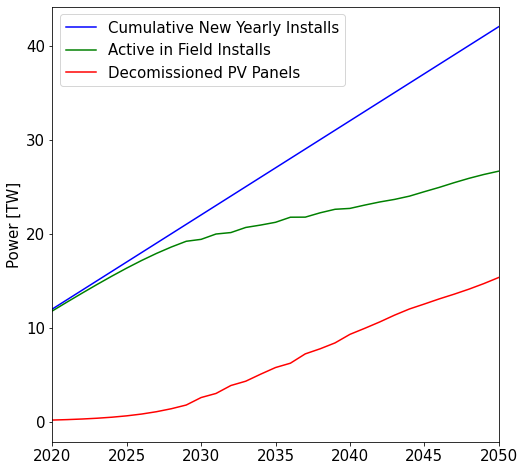

In [34]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)

fig, axs = plt.subplots(figsize=(8, 8))
axs.plot(UScum['new_Installed_Capacity_[MW]'+SFscenarios[0]]/1e6, 'b', label='Cumulative New Yearly Installs')
axs.plot(USyearly['Capacity_'+SFscenarios[0]]/1e12, 'g', label='Active in Field Installs')
axs.plot(UScum['new_Installed_Capacity_[MW]'+SFscenarios[0]]/1e6-USyearly['Capacity_'+SFscenarios[0]]/1e12, 'r', label='Decomissioned PV Panels')
axs.legend()
axs.set_xlim([2020,2050])
axs.set_ylabel('Power [TW]')
fig.savefig(title_Method+' Fig_New_Installs_vs_InstalledCapacity_vs_Waste', dpi=600)


In [37]:
foo0 = (UScum['new_Installed_Capacity_[MW]'+SFscenarios[0]]/1e6-USyearly['Capacity_'+SFscenarios[0]]/1e12).sum()
print(foo0)

198.97552440190063


In [38]:
E = (UScum['new_Installed_Capacity_[MW]World']/1e6).sum()
F = (UScum['new_Installed_Capacity_[MW]World']/1e6-USyearly['Capacity_World']/1e12).sum()
print("Cumulative Installs", E)
print("Cumulative Waste", F)
print("Fraction of Decomisioned to Installed Cumulative by 2050", F/E)


Cumulative Installs 903.0
Cumulative Waste 198.97552440190063
Fraction of Decomisioned to Installed Cumulative by 2050 0.22034941794230412


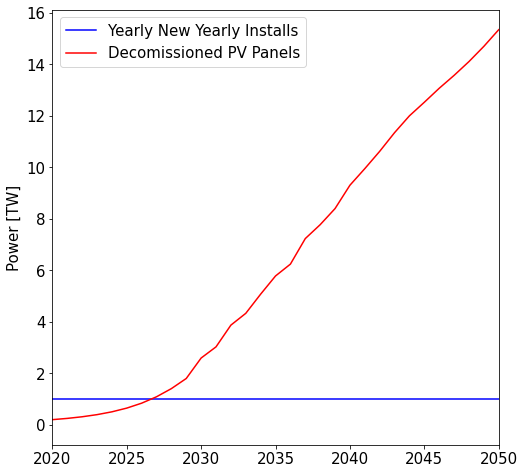

In [39]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)

fig, axs = plt.subplots(figsize=(8, 8))
axs.plot(USyearly['new_Installed_Capacity_[MW]World']/1e6, 'b', label='Yearly New Yearly Installs')
axs.plot(UScum['new_Installed_Capacity_[MW]World']/1e6-USyearly['Capacity_World']/1e12, 'r', label='Decomissioned PV Panels')
axs.legend()
axs.set_xlim([2020,2050])
axs.set_ylabel('Power [TW]')
fig.savefig(title_Method+' Fig_New_Installs_vs_Decomisions', dpi=600)


In [40]:
print("CUMULATIVE WASTE by 2050")
print("*************************")
print("")
UScum.iloc[-1]
print("MFG Scrap + EoL Material Only")
print("\t Reference Scenario: ", UScum['Waste_Module_World'].iloc[-1]/1e6, ' Million Tonnes')

print("EoL Material Only")
print("\t Reference Scenario: ", UScum['Waste_EOL_Module_World'].iloc[-1]/1e6, ' Million Tonnes')

print("MFG Scrap Only")
print("\t Reference Scenario: ", UScum['Waste_MFG_Module_World'].iloc[-1]/1e6, ' Million Tonnes')


CUMULATIVE WASTE by 2050
*************************

MFG Scrap + EoL Material Only
	 Reference Scenario:  957.5969166556922  Million Tonnes
EoL Material Only
	 Reference Scenario:  819.552589911594  Million Tonnes
MFG Scrap Only
	 Reference Scenario:  138.04432674409833  Million Tonnes


In [41]:
print(" VIRGIN STOCK Yearly Needs ")
print(" **************************")
for kk in range(0, 1):
    obj = SFscenarios[kk]
    print(obj)
    filter_col = [col for col in USyearly3sig if (col.startswith('VirginStock_') and col.endswith(obj)) ]
    display(USyearly3sig[filter_col].loc[[2030, 2040, 2050]])
    print("\n\n")
    
print(" VIRGIN STOCK Cumulative Needs ")
print(" ***************************** ")
for kk in range(0, 1):
    obj = SFscenarios[kk]
    print(obj)
    filter_col = [col for col in UScum3sig if (col.startswith('VirginStock_') and col.endswith(obj)) ]
    display(UScum3sig[filter_col].loc[[2030, 2040, 2050]])
    print("\n\n")

 VIRGIN STOCK Yearly Needs 
 **************************
World


VirginStock_glass_World  VirginStock_silicon_World  \
year                                                       
2030                 40600000                    1930000   
2040                 38800000                    1840000   
2050                 37700000                    1790000   

      VirginStock_silver_World  VirginStock_copper_World  \
year                                                       
2030                     10200                     33400   
2040                      9720                     31900   
2050                      9440                     31000   

      VirginStock_aluminum_World  VirginStock_Module_World  
year                                                        
2030                     4630000                  47200000  
2040                     4420000                  45100000  
2050                     4290000                  43800000




 VIRGIN STOCK Cumulative Needs 
 ***************************** 
World


VirginStock_glass_World  VirginStock_silicon_World  \
year                                                       
2030               1050000000                   83000000   
2040               1450000000                  102000000   
2050               1830000000                  120000000   

      VirginStock_silver_World  VirginStock_copper_World  \
year                                                       
2030                    892000                    905000   
2040                    991000                   1230000   
2050                   1090000                   1540000   

      VirginStock_aluminum_World  VirginStock_Module_World  
year                                                        
2030                   176000000                1310000000  
2040                   221000000                1770000000  
2050                   264000000                2220000000

In [42]:
print(" WASTE EoL CUMULATIVE RESULTS [Tonnes] ")
print(" ******************************************")
filter_col = [col for col in UScum3sig if (col.startswith('Waste_EOL_Module')) ]
display(UScum3sig[filter_col].loc[[2016,2020,2030, 2040, 2050]])


 WASTE EoL CUMULATIVE RESULTS [Tonnes] 
 ******************************************


Waste_EOL_Module_World
year                        
2016                   38100
2020                 1080000
2030               141000000
2040               533000000
2050               820000000

In [43]:
print(" WASTE EoL + MfgScrap CUMULATIVE RESULTS [Tonnes] ")
print(" ******************************************")
filter_col = [col for col in UScum3sig if (col.startswith('Waste_Module')) ]
display(UScum3sig[filter_col].loc[[2016,2020,2030, 2040, 2050]])


 WASTE EoL + MfgScrap CUMULATIVE RESULTS [Tonnes] 
 ******************************************


Waste_Module_World
year                    
2016            58300000
2020            76300000
2030           242000000
2040           653000000
2050           958000000

In [44]:
print(" WASTE MfgScrap CUMULATIVE RESULTS [Tonnes] ")
print(" ******************************************")
filter_col = [col for col in UScum3sig if (col.startswith('Waste_MFG_Module')) ]
display(UScum3sig[filter_col].loc[[2016,2020,2030, 2040, 2050]])


 WASTE MfgScrap CUMULATIVE RESULTS [Tonnes] 
 ******************************************


Waste_MFG_Module_World
year                        
2016                58200000
2020                75300000
2030               101000000
2040               120000000
2050               138000000

In [50]:
materials = ['Module', 'glass', 'aluminum', 'copper', 'silicon', 'silver']

print(" Appendix Table I: Metric Tonnes Installed in field in 2030")
print(" ########################################################### \n")
#Loop over scenarios
for kk in range (0, 1):
    obj = SFscenarios[kk]
    print("SCENARIO :", obj)

    print("********************************")
    print("********************************")

    modulemat = 0
    for ii in range(0, len(materials)):
        installedmat = (UScum3sig['VirginStock_'+materials[ii]+'_'+obj].loc[2030]-
              UScum3sig['Waste_'+materials[ii]+'_'+obj].loc[2030])
        print(materials[ii], ':', round(installedmat/1000)*1000, 'tons')

    print("Capacity in Year 2030 [GW]:", round(USyearly3sig['Capacity_'+obj].loc[2030]/1e9))
    print("Capacity in Year 2050 [GW]:", round(USyearly3sig['Capacity_'+obj].loc[2050]/1e9))
    print("****************************\n")

 Appendix Table I: Metric Tonnes Installed in field in 2030
 ########################################################### 

SCENARIO : World
********************************
********************************
Module : 1068000000 tons
glass : 884000000 tons
aluminum : 144200000 tons
copper : 725000 tons
silicon : 39300000 tons
silver : 456000 tons
Capacity in Year 2030 [GW]: 19400
Capacity in Year 2050 [GW]: 26600
****************************



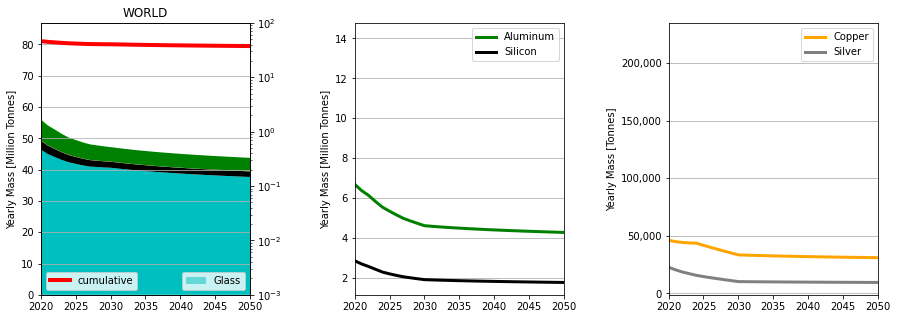

In [73]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.5)
axs = axs.ravel()
i = 0

# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios



for kk in range(0, 1):

    obj = SFscenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='c', alpha=0.5, label='Glass')
#    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
 #   axs[i].plot([],[],color='c', label='glass', linewidth=5)
 #   axs[i].plot([],[],color='k', label='silicon', linewidth=5)
 #   axs[i].plot([],[],color='m', label='silver', linewidth=5)
 #   axs[i].plot([],[],color='r', label='copper', linewidth=5)
 #   axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

    axs[i].stackplot(rr.scenario[obj].data['year'], USyearly[keyw+materials[0]+'_'+obj]/1e6, 
                                                      USyearly[keyw+materials[1]+'_'+obj]/1e6, 
                                                      USyearly[keyw+materials[2]+'_'+obj]/1e6, 
                                                      USyearly[keyw+materials[3]+'_'+obj]/1e6, 
                                                      USyearly[keyw+materials[4]+'_'+obj]/1e6, 
                                                      colors=['c','k','gray','orange', 'g'])
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    axs[i].set_title('WORLD')
    axs[i].legend(loc='lower right')

    #axs[i].legend(materials)


# 2nd axis plot

for kk in range(0, 1):

    obj = SFscenarios[kk]
    ax2=axs[i].twinx()
    ax2.plot(rr.scenario[obj].data['year'], USyearly[keyw+materials[0]+'_'+obj]/1e6, 
             color = 'r', linewidth=4.0, label='cumulative')
    #axs[i].ylabel('Mass [Tons]')
 #   axs[i].set_xlim([2010, 2050])
  #  axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    ax2.set_yscale('log')
    ax2.set_ylim([1e3/1e6, 1e8/1e6])
 

    ax2.legend()


i = 1
# ROW 2, Aluminum and Silicon:
# Loop over SF Scenarios
for kk in range(0, 1):


    obj = SFscenarios[kk]
    axs[i].yaxis.grid()
#    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)

    axs[i].plot(rr.scenario[obj].data['year'], USyearly[keyw+materials[4]+'_'+obj]/1e6, color='g', lw=3, label='Aluminum')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[4]+'_'+obj.name], 
 #                   color='g', lw=3, alpha=.6)
    
    axs[i].plot(rr.scenario[obj].data['year'], USyearly[keyw+materials[1]+'_'+obj]/1e6, color='k', lw=3, label='Silicon')
   # axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[1]+'_'+obj.name], 
   #                 color='k', lw=3)# alpha=.3)


    # silicon aluminum 'k ''g'
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    axs[i].legend()



i=2

# ROW 3:
# Loop over SF Scenarios
for kk in range(0, 1):

    obj = SFscenarios[kk]
    axs[i].yaxis.grid()

    axs[i].plot(rr.scenario[obj].data['year'], USyearly[keyw+materials[3]+'_'+obj], color='orange', lw=3, label='Copper')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[3]+'_'+obj.name], 
  #                  color='orange', lw=3)# alpha=.3)

    axs[i].plot(rr.scenario[obj].data['year'], USyearly[keyw+materials[2]+'_'+obj], color='gray', lw=3, label='Silver')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[2]+'_'+obj.name], 
 #                   color='gray', lw=3)# , alpha=.6)
    
    
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    axs[i].legend()
    axs[i].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))


    
#axs[i].set_ylim([0, 5e7/1e6])
#axs[i+3].set_ylim([0, 3e6/1e6])
#axs[i+6].set_ylim([0, 2.5e4])

#    axs[i+3].set_yscale('log')
#    axs[i+6].set_yscale('log')

axs[0].set_ylabel('Yearly Mass [Million Tonnes]')
axs[1].set_ylabel('Yearly Mass [Million Tonnes]')
axs[2].set_ylabel('Yearly Mass [Tonnes]')

#axs[8].legend(materials)

fig.savefig(title_Method+' Fig_3x3_WORLD_MaterialNeeds_Nation.png', dpi=600)

In [58]:
keyword='Cumulative_Area_disposed'

USyearly_Areadisp=pd.DataFrame()

# Loop over SF Scenarios
for kk in range(0, 1):
    obj = SFscenarios[kk]
    # Loop over Materials
    foo = rr.scenario[obj].data[keyword].copy()
    USyearly_Areadisp["Areadisp_"+obj] = foo

    # Loop over STATEs
    #for jj in range (1, len(STATEs)): 
     #   USyearly_Areadisp["Areadisp_"+obj] += rr.scenario[obj].data[keyword]



In [59]:
UScum_Areadisp = USyearly_Areadisp.copy()
UScum_Areadisp = UScum_Areadisp.cumsum()

In [60]:
A = UScum['Waste_Module_World'].iloc[-1]
#47700000 # tonnes cumulative by 2050
A = A*1000 # convert to kg
A = A/10.05599 # convert to m2 if each m2 is ~avg 10 kg
#A = A*2 # convert to area if each module is ~2 m2
A = A/1e6 # Convert to km 2
print(A)

95226.5183891086


In [61]:
C = UScum_Areadisp['Areadisp_World'].iloc[-1]/1e6


In [62]:
# MANHATTAN SIZE:
manhattans = 59.103529

In [63]:
print("Reference Cumulative Area by 2050 of Waste PV Modules EoL", round(C), " km^2")

print("")
print("Reference Waste equals ", round(C/manhattans), " Manhattans ")

print("")
print ("MFG SCrap + Eol Waste")
print("Reference Cumulative Area by 2050 of Waste PV Mfg + Modules EoL", round(A), " km^2")


Reference Cumulative Area by 2050 of Waste PV Modules EoL 79360  km^2

Reference Waste equals  1343  Manhattans 

MFG SCrap + Eol Waste
Reference Cumulative Area by 2050 of Waste PV Mfg + Modules EoL 95227  km^2


### New Section

VirginStock_aluminum_Reference.Mod
VirginStock_aluminum_95-by-35.Adv  
VirginStock_aluminum_95-by-35_Elec.Adv_DR 
Waste_EOL_aluminum_Reference.Mod  
Waste_EOL_aluminum_95-by-35.Adv  
Waste_EOL_aluminum_95-by-35_Elec.Adv_DR  

VirginStock_silver_Reference.Mod
VirginStock_silver_95-by-35.Adv  
VirginStock_silver_95-by-35_Elec.Adv_DR 
Waste_EOL_silver_Reference.Mod  
Waste_EOL_silver_95-by-35.Adv  
Waste_EOL_silver_95-by-35_Elec.Adv_DR  


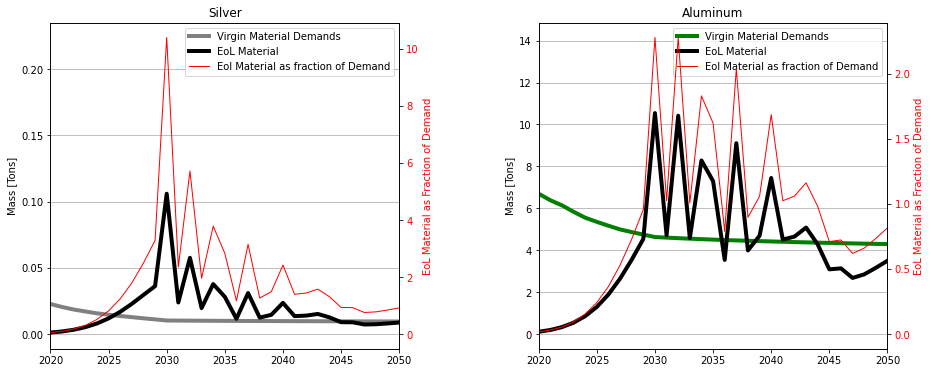

In [67]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
fig, axs = plt.subplots(1,2, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=.4)
axs = axs.ravel()

# PLOT 1
i = 0
axs[i].yaxis.grid()
lns1 = axs[i].plot(USyearly.index, USyearly['VirginStock_silver_World']/1e6, color='gray', linewidth=4.0, label='Virgin Material Demands')
lns2 = axs[i].plot(USyearly.index, USyearly['Waste_EOL_silver_World']/1e6, color='k', linewidth=4.0, label='EoL Material')
axs[i].set_ylabel('Mass [Tons]')
axs[i].set_xlim([2020, 2050])
axs[i].set_title('Silver')

# 2nd axis plot
ax2=axs[i].twinx()
lns3 = ax2.plot(USyearly.index, USyearly['Waste_EOL_silver_World']/USyearly['VirginStock_silver_World'], 
             color = 'r', linewidth=1.0, label='Eol Material as fraction of Demand')
ax2.set_ylabel('EoL Material as Fraction of Demand', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# LEGENDS
# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
axs[0].legend(lns, labs, loc=0)

# PLOT 2
i = 1
axs[i].yaxis.grid()
lns1 = axs[i].plot(USyearly.index, USyearly['VirginStock_aluminum_World']/1e6, color='g', linewidth=4.0, label='Virgin Material Demands')
lns2 = axs[i].plot(USyearly.index, USyearly['Waste_EOL_aluminum_World']/1e6, color='k', linewidth=4.0, label='EoL Material')
axs[i].set_ylabel('Mass [Tons]')
axs[i].set_xlim([2020, 2050])
axs[i].set_title('Aluminum')

# 2nd axis plot
ax2=axs[i].twinx()
lns3 = ax2.plot(USyearly.index, USyearly['Waste_EOL_aluminum_World']/USyearly['VirginStock_aluminum_World'], 
             color = 'r', linewidth=1.0, label='Eol Material as fraction of Demand')

ax2.set_ylabel('EoL Material as Fraction of Demand', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# LEGENDS
# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
axs[1].legend(lns, labs, loc=0)
